In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading the dataset

bike_share=pd.read_csv("day.csv")
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Checking the shape and info
bike_share.shape

(730, 16)

In [11]:
bike_share.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspee

In [6]:
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Checking the percentage of missing values in each column
round(100*(bike_share.isnull().sum()/len(bike_share)),2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [16]:
#There are no missing values in any column

In [8]:
#Duplicate value check:
bike_share_dup=bike_share.drop_duplicates(subset=None,inplace=True)
bike_share.shape

(730, 16)

In [18]:
#No duplicate values found

In [35]:
#Creating a dataset with only usefull columnsfrom bike_share dataset

bike_new=bike_share[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [10]:
bike_new.shape

(730, 12)

In [11]:
bike_new.info

<bound method DataFrame.info of      season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0         1   0     1        0        1           1           2  14.110847   
1         1   0     1        0        2           1           2  14.902598   
2         1   0     1        0        3           1           1   8.050924   
3         1   0     1        0        4           1           1   8.200000   
4         1   0     1        0        5           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
725       1   1    12        0        5           1           2  10.420847   
726       1   1    12        0        6           0           2  10.386653   
727       1   1    12        0        0           0           2  10.386653   
728       1   1    12        0        1           1           1  10.489153   
729       1   1    12        0        2           1           2   8.849153   

        atemp      hum  windspe

In [12]:
#Visualizing the data

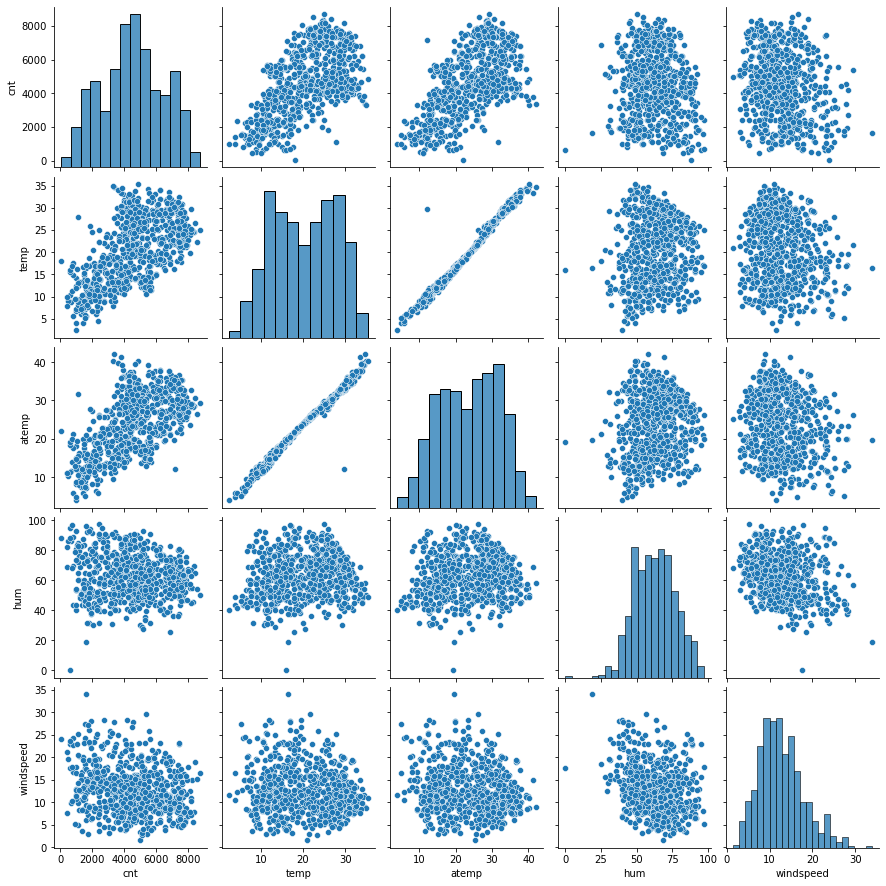

In [15]:
#Visualizing the numeric values using pairplot

sns.pairplot(data=bike_new,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

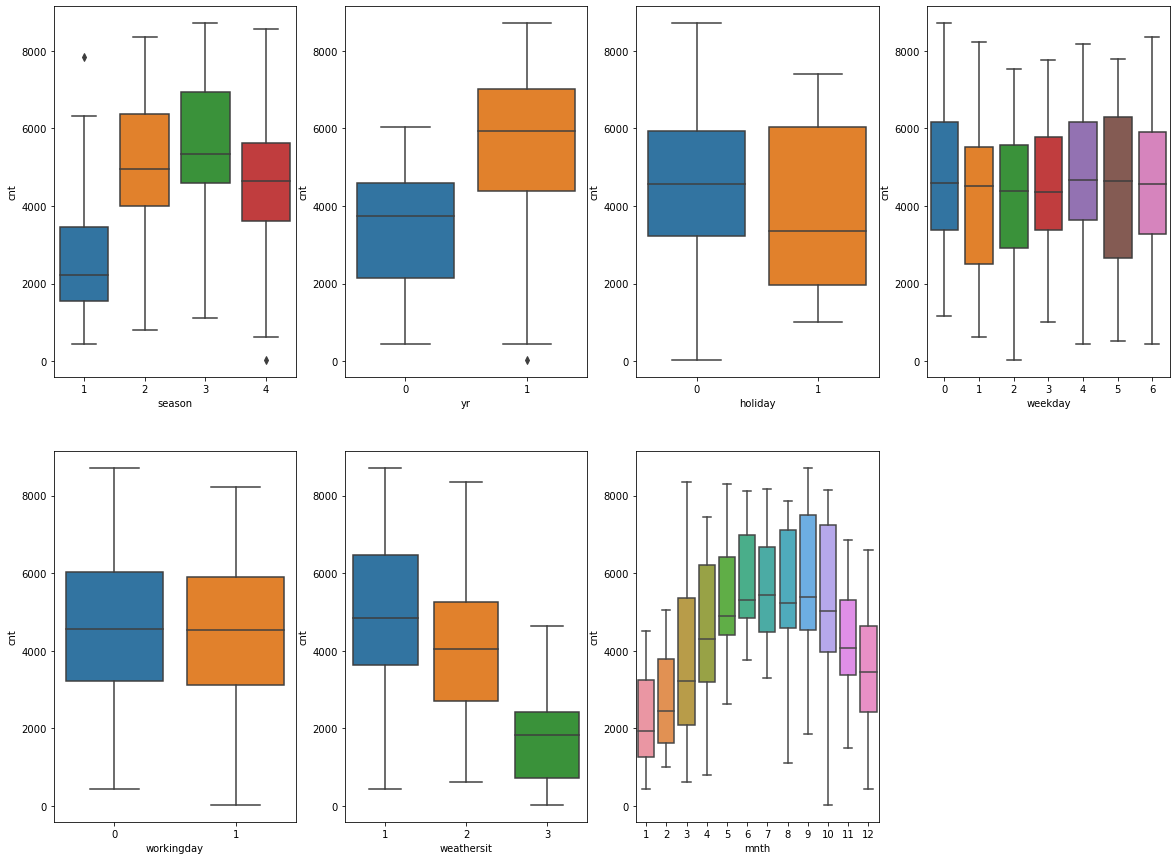

In [17]:
#Visualizing categorical variable using boxplot
plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
sns.boxplot(x="season",y="cnt",data=bike_new)
plt.subplot(2,4,2)
sns.boxplot(x="yr",y="cnt",data=bike_new)
plt.subplot(2,4,3)
sns.boxplot(x="holiday",y="cnt",data=bike_new)
plt.subplot(2,4,4)
sns.boxplot(x="weekday",y="cnt",data=bike_new)
plt.subplot(2,4,5)
sns.boxplot(x="workingday",y="cnt",data=bike_new)
plt.subplot(2,4,6)
sns.boxplot(x="weathersit",y="cnt",data=bike_new)
plt.subplot(2,4,7)
sns.boxplot(x="mnth",y="cnt",data=bike_new)
plt.show()

In [18]:
# Mapping the categorical values to their string values

In [37]:
#Mapping month
import calendar
bike_new["mnth"]=bike_new["mnth"].apply(lambda x:calendar.month_abbr[x])

#Mapping seasons

bike_new.season=bike_new.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

#Mapping weathersit

bike_new.weathersit=bike_new.weathersit.map({1:'Clear',2:'Mist & Cloudy', 3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

#Mapping weekday
bike_new.weekday = bike_new.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [38]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [39]:
#Creating Dummy variables

#Creating dummy variables for the features season,mnth,weekday,weathersit 

Dummy=bike_new[['season','mnth','weekday','weathersit']]


In [40]:
Dummy=pd.get_dummies(Dummy,drop_first=True)

In [41]:
#Adding the Dummy column to the Dataset

bike_new=pd.concat([bike_new,Dummy],axis=1)

In [42]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#Deleting the columns season,weathersit,weekday,mnth

bike_new.drop(['season','weathersit','weekday','mnth'],axis=1,inplace=True)

In [44]:
bike_new.shape

(730, 30)

In [45]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#Splitting the data into Test and Train Sets

from sklearn.model_selection import train_test_split

train,test=train_test_split(bike_new, train_size=0.7,test_size=0.3,random_state=100)

In [48]:
train.shape

(510, 30)

In [49]:
test.shape

(219, 30)

In [50]:
#Rescaling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
#Creating a list of numerical variables

num_vars=["cnt","hum","windspeed","temp","atemp"]

train[num_vars]=scaler.fit_transform(train[num_vars])

In [53]:
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [55]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


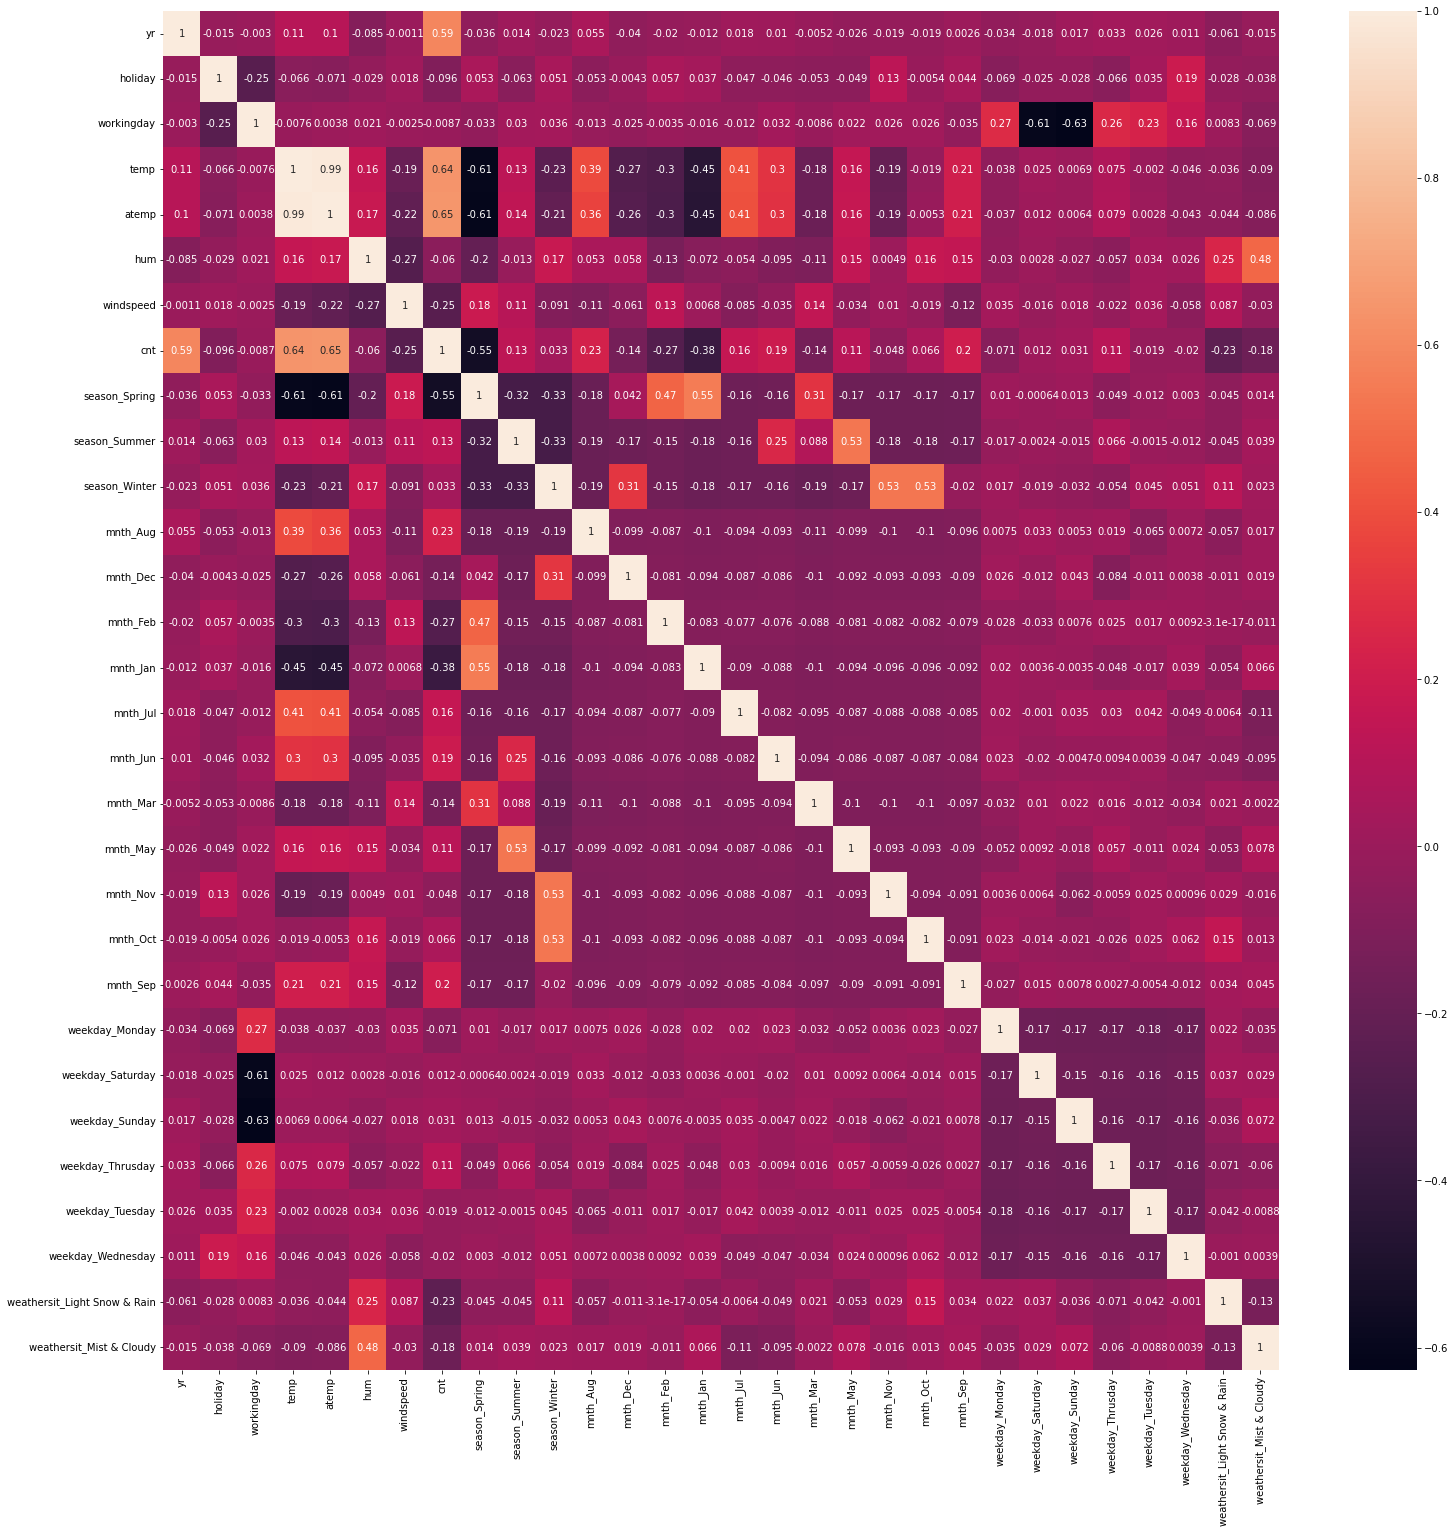

In [58]:
plt.figure(figsize=(25,25))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [59]:
#Dividing into X and Y sets

y_train=train.pop("cnt")
X_train=train

In [60]:
y_train.shape

(510,)

In [61]:
X_train.shape

(510, 29)

In [65]:
#Using RFE for feature selection and statsmodel for model building
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [71]:
#Starting with 15 variables

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [80]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [84]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [83]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [85]:
#Using Statsmodel for building model

#Creating Dataframe using RFE selected variables for X_test

X_train_rfe=X_train[col]

In [87]:
#Adding constant variable

import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)


In [88]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


In [89]:
#Running the model
lm_1 = sm.OLS(y_train,X_train_rfe).fit()

In [90]:
lm_1.params

const                           0.320243
yr                              0.230328
holiday                        -0.091228
temp                            0.479977
hum                            -0.160227
windspeed                      -0.188457
season_Spring                  -0.061737
season_Summer                   0.040767
season_Winter                   0.103435
mnth_Dec                       -0.037199
mnth_Jan                       -0.043748
mnth_Jul                       -0.055495
mnth_Nov                       -0.040949
mnth_Sep                        0.074891
weathersit_Light Snow & Rain   -0.248116
weathersit_Mist & Cloudy       -0.055876
dtype: float64

In [91]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          3.34e-189
Time:                        15:55:37   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [96]:
#Since all the variables has p-value<0.05,we can proceed

In [95]:
#Checking Variation inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
6,season_Spring,5.27
3,temp,4.42
8,season_Winter,3.83
7,season_Summer,2.76
4,hum,1.93
12,mnth_Nov,1.76
10,mnth_Jan,1.68
15,weathersit_Mist & Cloudy,1.57
9,mnth_Dec,1.49


In [103]:
#Dropping the column const where VIF>5
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [98]:
vif=pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_Spring,4.37
7,season_Winter,4.06
6,season_Summer,2.81
14,weathersit_Mist & Cloudy,2.32
0,yr,2.09
11,mnth_Nov,1.83
9,mnth_Jan,1.75


In [114]:
#Dropping hum
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [100]:
vif=pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_Winter,2.94
4,season_Spring,2.89
5,season_Summer,2.23
0,yr,2.07
10,mnth_Nov,1.80
8,mnth_Jan,1.66
9,mnth_Jul,1.59
13,weathersit_Mist & Cloudy,1.56


In [110]:
#Preparing final model

#Adding constant variable

X_train_lm=sm.add_constant(X_train_rfe)


In [112]:
#Creating a fitted model

lm2=sm.OLS(y_train,X_train_lm).fit()

In [113]:
#Checking the summary of lm2

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          1.57e-186
Time:                        20:44:55   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [115]:
#Calculating VIF
vif=pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_Winter,2.94
4,season_Spring,2.89
5,season_Summer,2.23
0,yr,2.07
10,mnth_Nov,1.80
8,mnth_Jan,1.66
9,mnth_Jul,1.59
13,weathersit_Mist & Cloudy,1.56


In [116]:
#Residual analysis for train data

y_train_cnt=lm2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

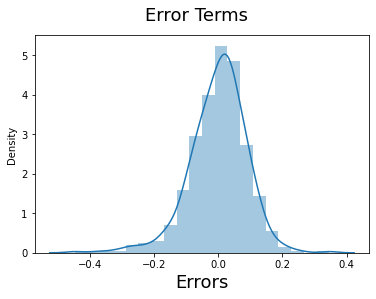

In [118]:
fig=plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)
fig.suptitle("Error Terms",fontsize=18)
plt.xlabel('Errors',fontsize=18)

In [119]:
#It is having a normal distribution

In [120]:
#Making predictions using the model

num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [121]:
test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
#Dividing into X_test and Y_test
y_test=test.pop("cnt")
X_test=test

In [123]:
#Adding constant variables
X_test=sm.add_constant(X_test)

In [124]:
test_col=X_train_lm.columns
X_test=X_test[test_col[1:]]
X_test=sm.add_constant(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   yr                            219 non-null    int64  
 2   holiday                       219 non-null    int64  
 3   temp                          219 non-null    float64
 4   windspeed                     219 non-null    float64
 5   season_Spring                 219 non-null    uint8  
 6   season_Summer                 219 non-null    uint8  
 7   season_Winter                 219 non-null    uint8  
 8   mnth_Dec                      219 non-null    uint8  
 9   mnth_Jan                      219 non-null    uint8  
 10  mnth_Jul                      219 non-null    uint8  
 11  mnth_Nov                      219 non-null    uint8  
 12  mnth_Sep                      219 non-null    uint8  
 13  weat

In [126]:
#Prediction using final model

y_pred = lm2.predict(X_test)

In [128]:
#Calculating the r_squared

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8132736736429257

In [129]:
#R squared value for test set and train set are almost equal

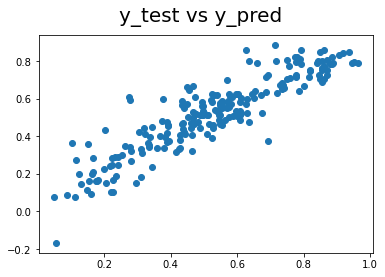

In [135]:
#Model Evaluation by plotting y_test and y_train

fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.show()

In [132]:
#The final model has good predictive power

In [ ]:
#Equation of our best fitted line is:
# cnt=0.2466+0.44*temp+0.089*season_Winter+0.033*season_Summer+0.234*yr+0.68*mnth_Sep-0.159*windspeed-0.072*season_Spring-0.042*mnth_Nov-0.05*mnth_Jan-0.05*mnth_Jul-0.081*weathersit_Mist & Cloudy-0.044*mnth_Dec-0.3*weathersit_Light Snow & Rain-0.09*holiday